In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['PRICE'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

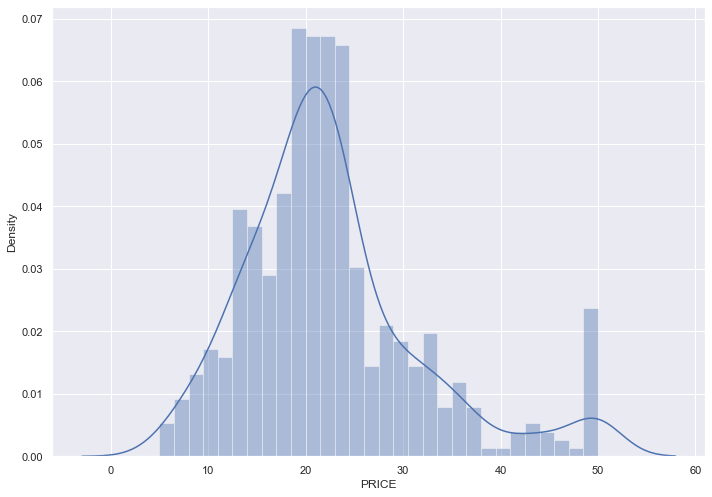

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['PRICE'], bins=30)
plt.show()

<AxesSubplot:>

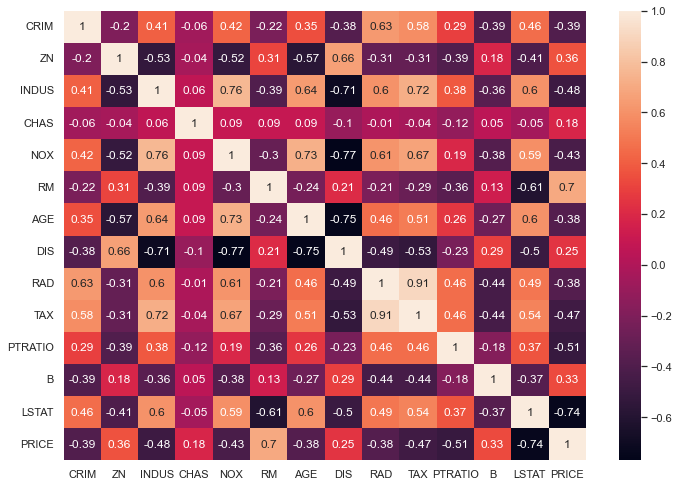

In [6]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
x = boston.iloc[:,:-1]
y = boston['PRICE']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

Linear Regression Model

In [9]:
lin_model = LinearRegression()

In [10]:
lin_model.fit(x_train, y_train)
lin_model.predict(x_test)

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

In [11]:
cvs = cross_val_score(lin_model, x, y, scoring = "neg_mean_squared_error", cv = 10)

In [12]:
print(cvs)
mean_cvs = np.mean(cvs)
print(mean_cvs)

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
-34.705255944524815


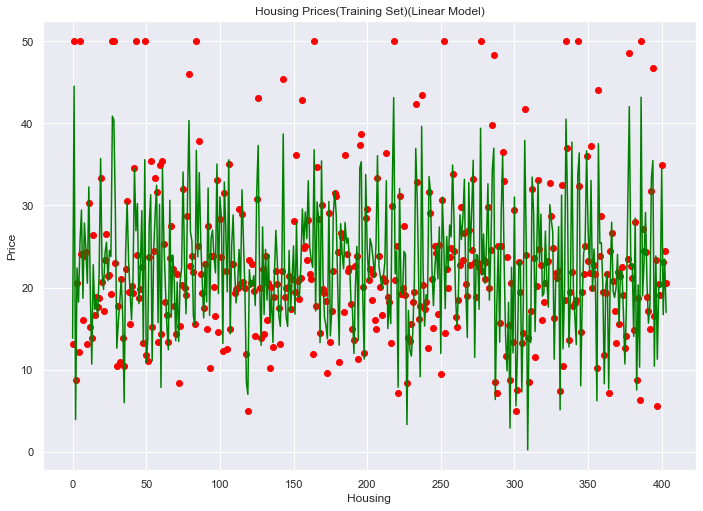

In [13]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "red")
plt.plot(x_train1,lin_model.predict(x_train),color = "green")
plt.title("Housing Prices(Training Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

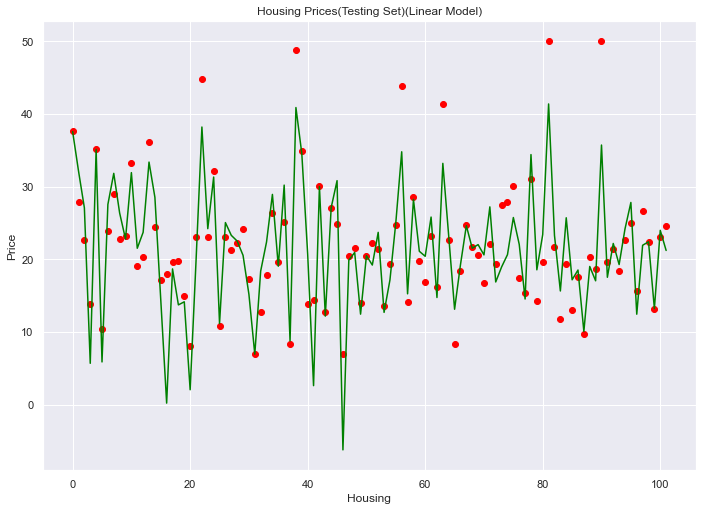

In [14]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "red")
plt.plot(x_test1,lin_model.predict(x_test),color = "green")
plt.title("Housing Prices(Testing Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

Ridge Regression Model

In [15]:
ridge = Ridge()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_model = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv = 10)

In [16]:
ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

In [17]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.01}
-25.221198489009232


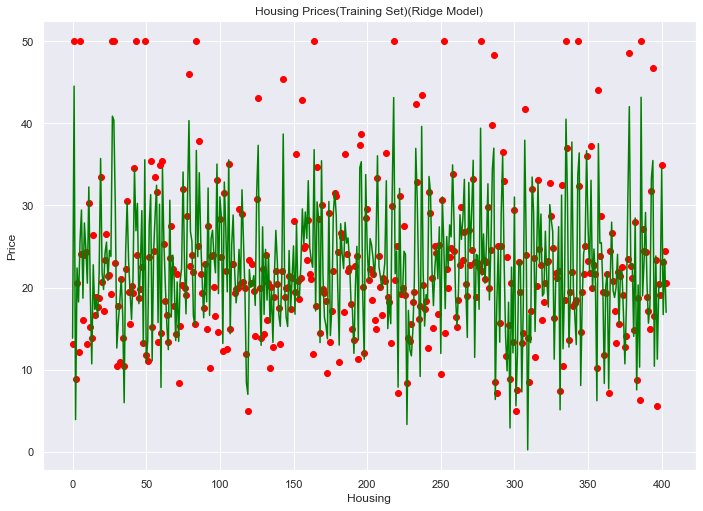

In [18]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "red")
plt.plot(x_train1,ridge_model.predict(x_train),color = "green")
plt.title("Housing Prices(Training Set)(Ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

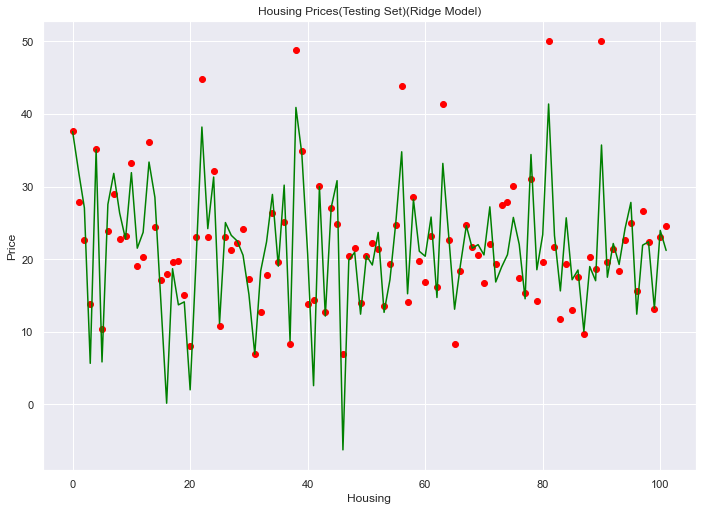

In [19]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "red")
plt.plot(x_test1,ridge_model.predict(x_test),color = "green")
plt.title("Housing Prices(Testing Set)(Ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

Lasso Regression Model

In [20]:
lasso = Lasso()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_model = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv = 10)

In [21]:
lasso_model.fit(x_train,y_train)
lasso_model.predict(x_test)

array([37.55246613, 32.1454225 , 27.06059124,  5.64956628, 35.07646748,
        5.85219766, 27.55452981, 31.78238029, 26.34691719, 22.74993594,
       31.89636497, 21.52694755, 23.70420561, 33.36798031, 28.51073181,
       14.39976197,  0.14571673, 18.73771148, 13.71569301, 14.11120963,
        1.99520903, 19.73808669, 38.17463252, 24.20453531, 31.30033596,
       11.15896237, 25.04408211, 23.27141094, 22.53362324, 20.55314264,
       15.14460093,  6.89265899, 18.36420157, 22.3877754 , 28.8998001 ,
       19.03876562, 30.16566017,  8.73677206, 40.8923871 , 34.54965475,
       20.71121557,  2.58134479, 29.98546839, 12.17106185, 27.07736175,
       30.79375537, -6.25050315, 19.83667004, 21.00468271, 12.43050005,
       20.48389416, 19.20267217, 23.66303121, 12.68079177, 17.21499882,
       25.06612226, 34.76960582, 15.2471095 , 28.20383014, 21.08254047,
       20.40282692, 25.79527987, 14.72709904, 33.17311615, 23.20335621,
       13.11749138, 19.24478185, 24.61846372, 21.48590551, 21.99

In [22]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.001}
-25.221505383304866


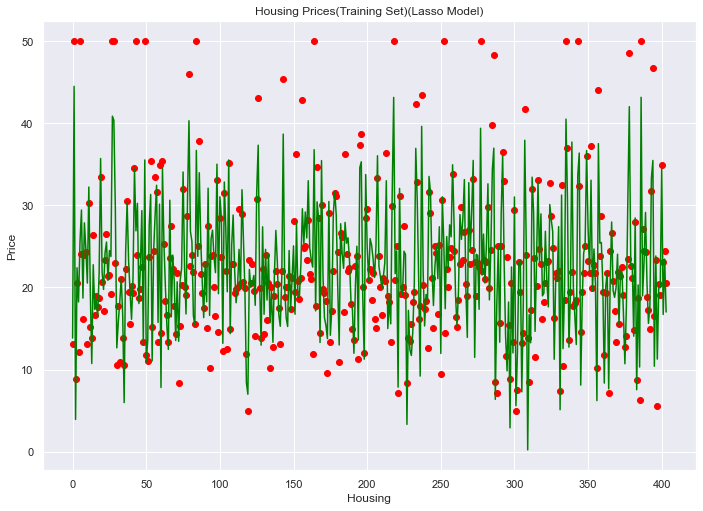

In [23]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "red")
plt.plot(x_train1,lasso_model.predict(x_train),color = "green")
plt.title("Housing Prices(Training Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

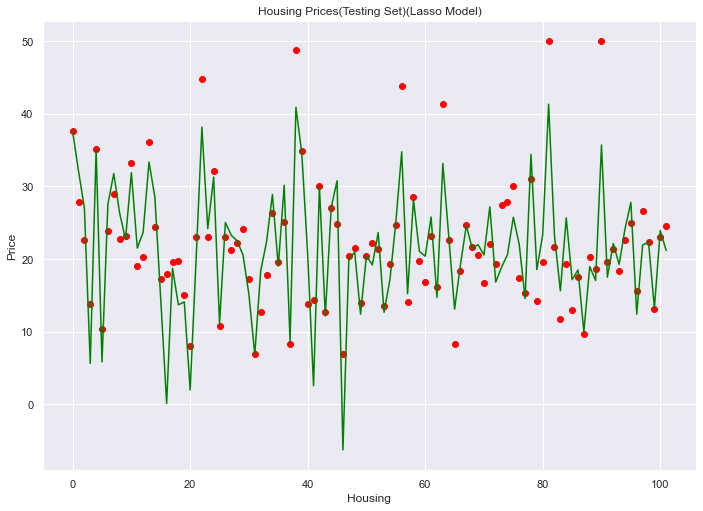

In [24]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "red")
plt.plot(x_test1,lasso_model.predict(x_test),color = "green")
plt.title("Housing Prices(Testing Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

ElasticNet Regression Model

In [25]:
elasticnet = ElasticNet()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
elastic_model = GridSearchCV(elasticnet,params,scoring = "neg_mean_squared_error",cv = 10)

In [26]:
elastic_model.fit(x_train,y_train)
elastic_model.predict(x_test)

array([37.49399585, 32.14815788, 27.03175701,  5.52460627, 35.02815341,
        5.81166121, 27.65310573, 31.69737725, 26.29188755, 22.61461737,
       31.81619838, 21.66910537, 23.70930189, 33.41274108, 28.47067406,
       14.42134173, -0.14394874, 19.15936233, 13.74987373, 13.94589519,
        1.76453605, 19.78089589, 38.11587274, 24.24023893, 31.2898404 ,
       11.26244283, 25.08327519, 23.22054849, 22.75973359, 20.68197181,
       14.99941083,  6.68640814, 18.40537491, 22.49232945, 28.82167625,
       19.07640301, 30.07681204,  8.69197943, 41.05872556, 34.62443929,
       20.75934203,  2.48980152, 29.91644177, 12.24836272, 26.90977146,
       30.71659892, -6.31159565, 19.73378229, 21.43607205, 12.4027807 ,
       20.42025362, 19.26147824, 23.48958057, 12.68485972, 17.62709753,
       25.17068571, 34.74280804, 15.33256422, 28.07317655, 21.04094708,
       20.44850587, 25.79797891, 14.7258352 , 33.07166896, 23.43010373,
       13.14519385, 19.31833126, 24.65644686, 21.37532066, 21.91

In [27]:
print(elastic_model.best_params_)
print(elastic_model.best_score_)

{'alpha': 0.001}
-25.198322559260323


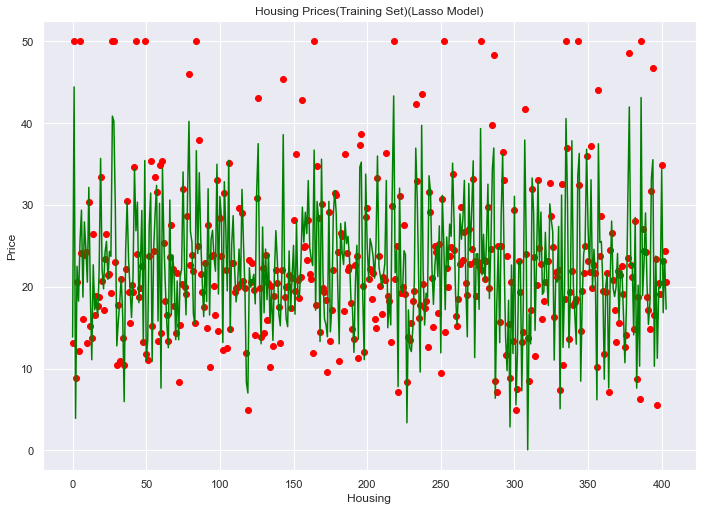

In [28]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "red")
plt.plot(x_train1,elastic_model.predict(x_train),color = "green")
plt.title("Housing Prices(Training Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

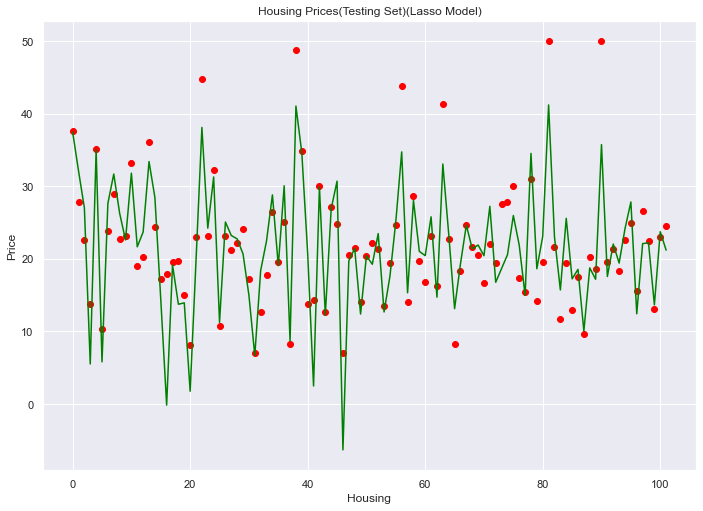

In [29]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "red")
plt.plot(x_test1,elastic_model.predict(x_test),color = "green")
plt.title("Housing Prices(Testing Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()